In [1]:
# https://gmarti.gitlab.io/cryptocurrency/2017/08/25/download-cryptocoins-api-python.html

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from joblib import Parallel, delayed
import operator
import matplotlib.pyplot as plt

In [5]:
from crycompare import *

In [6]:
# from ClusterLib import *
# from ClusterLib.distlib import *

In [8]:
p = Price()

coinList = p.coinList()
coins = sorted(list( coinList['Data'].keys() ))
print(coins)

['007', '1337', '1CR', '1ST', '2015', '2BACCO', '2GIVE', '32BIT', '365', '404', '42', '4CHN', '611', '808', '888', '8BIT', '8BT', 'ABY', 'AC', 'ACES', 'ACID', 'ACN', 'ACOIN', 'ACP', 'ACT', 'ADC', 'ADCN', 'ADL', 'ADN', 'ADST', 'ADT', 'ADX', 'ADZ', 'AE', 'AEC', 'AEON', 'AERO', 'AGRS', 'AGS', 'AHT', 'AHT*', 'AIB', 'AIR', 'ALC', 'ALEX', 'ALF', 'ALN', 'ALTC', 'AM', 'AMBER', 'AMC', 'AMIS', 'AMMO', 'AMP', 'AMS', 'AMT', 'AMY', 'ANAL', 'ANC', 'ANCP', 'AND', 'ANNC', 'ANT', 'ANTC', 'ANTI', 'APC', 'APEX', 'APT', 'APX', 'ARB', 'ARC', 'ARC*', 'ARCH', 'ARCO', 'ARDR', 'ARG', 'ARGUS', 'ARI', 'ARI*', 'ARK', 'ARM', 'ARNA', 'ARPA', 'ASAFE', 'ASN', 'AST', 'ATB', 'ATL', 'ATM', 'ATMS', 'ATOM', 'ATOM*', 'ATX', 'AUR', 'AUT', 'AUTH', 'AV', 'AVT', 'AXIOM', 'AXR', 'B3', 'B@', 'BAC', 'BAN', 'BANKEX', 'BASH', 'BAT', 'BAY', 'BBCC', 'BBR', 'BBT', 'BCAP', 'BCCOIN', 'BCF', 'BCH', 'BCN', 'BCR', 'BCX', 'BCY', 'BELA', 'BEN', 'BENJI', 'BERN', 'BEST', 'BET', 'BET*', 'BFX', 'BHC', 'BIC', 'BIGUP', 'BIOB', 'BIOS', 'BIP', 'BIT1

In [9]:
h = History()

df_dict = {}
for coin in coins:
    histo = h.histoDay(coin,'USD',allData=True)
    if histo['Data']:
        df_histo = pd.DataFrame(histo['Data'])
        df_histo['time'] = pd.to_datetime(df_histo['time'],unit='s')
        df_histo.index = df_histo['time']
        del df_histo['time']
        del df_histo['volumefrom']
        del df_histo['volumeto']
        
        df_dict[coin] = df_histo

In [10]:
crypto_histo = pd.concat(df_dict.values(), axis=1, keys=df_dict.keys())

In [11]:
histo_coins = [elem for elem in crypto_histo.columns.levels[0] if not elem == 'MYC']

In [12]:
histo_length = {}
for coin in histo_coins:
    histo_length[coin] = np.sum( ~np.isnan(crypto_histo[coin]['close'].values) )
    
sorted_length = sorted(histo_length.items(), key=operator.itemgetter(1),reverse=True)

In [13]:
# we keep the 300 coins having the longest time series of historical prices
sub_coins = [sorted_length[i][0] for i in range(300)]

sub_crypto_histo = crypto_histo[sub_coins]
sub_crypto_histo.tail()

BTC                                POT                  \
              close     high      low     open   close    high     low   
time                                                                     
2017-08-23  4141.09  4255.62  4070.49  4089.70  0.1245  0.1335  0.1191   
2017-08-24  4318.35  4364.11  4111.71  4141.09  0.1289  0.1324  0.1211   
2017-08-25  4364.41  4461.71  4292.63  4318.35  0.1329  0.1576  0.1264   
2017-08-26  4352.30  4379.28  4263.28  4364.41  0.1297  0.1345  0.1257   
2017-08-27  4389.91  4371.62  4347.51  4352.30  0.1314  0.1307  0.1289   

                         TEK             ...        FLDC                GAP  \
              open     close      high   ...         low     open     close   
time                                     ...                                  
2017-08-23  0.1267  0.000124  0.000170   ...     0.01237  0.01399  0.006584   
2017-08-24  0.1245  0.000130  0.000131   ...     0.01299  0.01350  0.006693   
2017-08-25  0.1289  0.000175  0.000179   ...     0.01365  0.01455  0.006197   
2017-08-26  0.1329  0.000174  0.008189   ...     0.01394  0.01484  0.005789   
2017-08-27  0.1297  0.000132  0.000175   ...     0.01526  0.01545  0.005859   

                                              GRC                             
                high       low      open    close     high      low     open  
time                                                                          
2017-08-23  0.006766  0.006309  0.006339  0.04046  0.07103  0.03244  0.03280  
2017-08-24  0.006939  0.006373  0.006584  0.04085  0.05145  0.03857  0.04046  
2017-08-25  0.007094  0.006096  0.006693  0.03758  0.04221  0.03576  0.04085  
2017-08-26  0.006525  0.005457  0.006197  0.03978  0.04103  0.03487  0.03758  
2017-08-27  0.005814  0.005782  0.005789  0.04009  0.04031  0.03952  0.03978  

[5 rows x 1200 columns]

In [14]:
N = len(sub_coins)
recent_histo = sub_crypto_histo[-1000:]

In [15]:
returns_dict = {}
for coin in sub_coins:
    coin_histo = recent_histo[coin]
    coin_returns = pd.DataFrame(np.diff(np.log(coin_histo.get_values()),axis=0))
    returns_dict[coin] = coin_returns

recent_returns = pd.concat(returns_dict.values(),axis=1,keys=returns_dict.keys())
recent_returns.index = recent_histo.index[1:]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [16]:
recent_returns = recent_returns.replace([np.inf, -np.inf], np.nan)
recent_returns = recent_returns.fillna(value=0)

In [17]:
recent_returns.isnull().values.any()

False

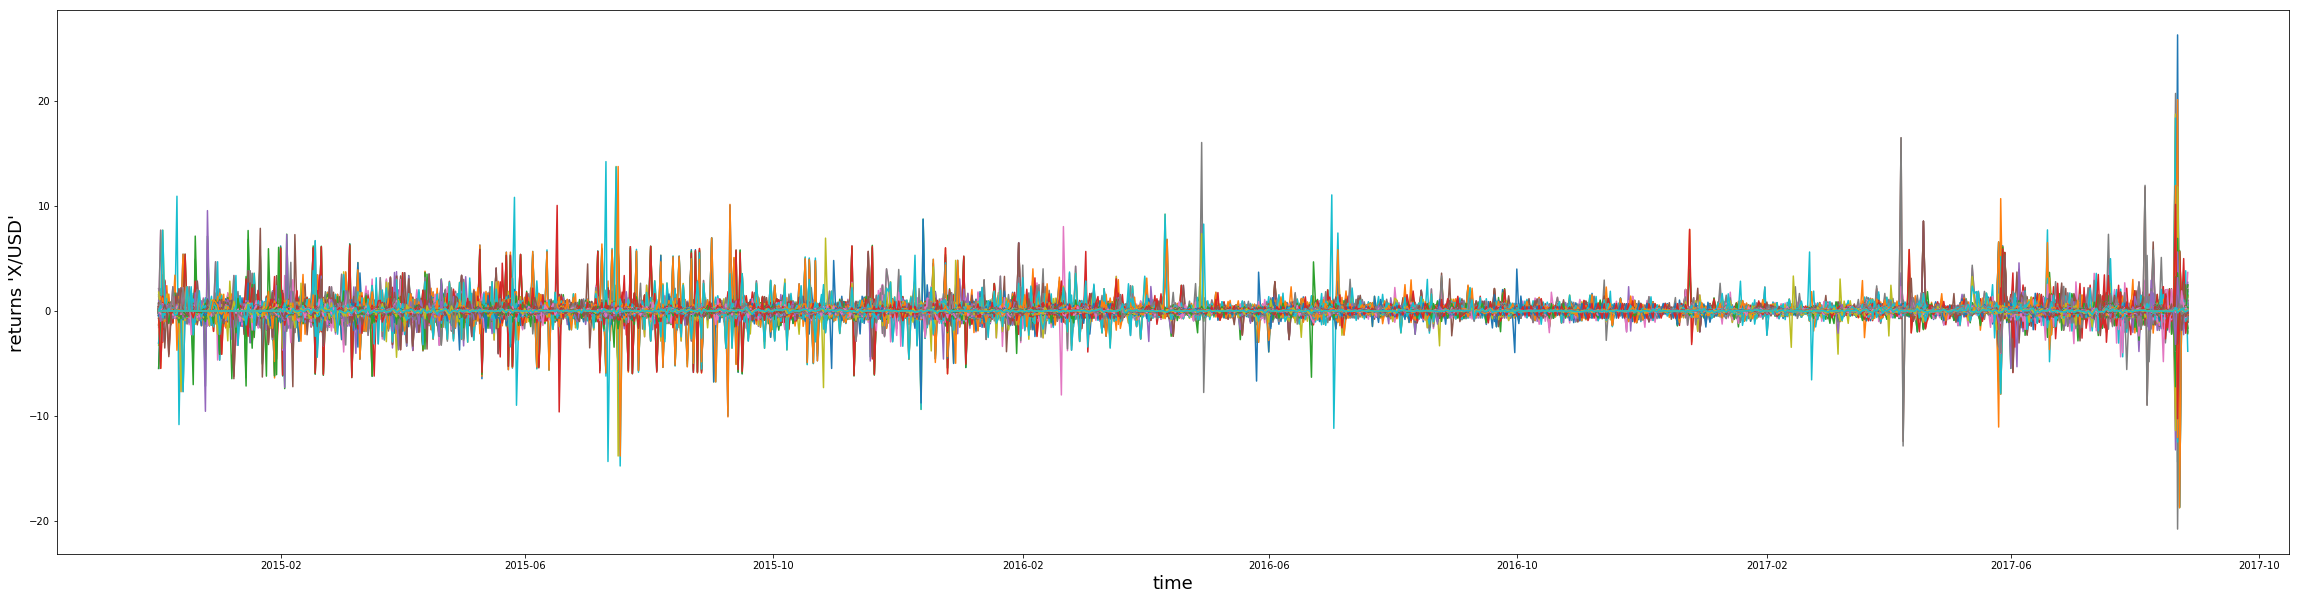

In [18]:
plt.figure(figsize=(40,10))
for coin in sub_coins:
    plt.plot(recent_returns[coin])
#plt.legend(sub_coins,loc='upper left')
plt.xlabel('time',fontsize=18)
plt.ylabel('returns \'X/USD\'',fontsize=18)
plt.show()

In [19]:
dist_mat = np.zeros((N,N))
a,b = np.triu_indices(N,k=1)
dist_mat[a,b] = Parallel(n_jobs=-2,verbose=1) (delayed(distcorr)(recent_returns[sub_coins[a[i]]],recent_returns[sub_coins[b[i]]]) for i in range(len(a)))
dist_mat[b,a] = dist_mat[a,b]

NameError: name 'distcorr' is not defined

In [ ]:
seriated_dist_mat, res_order, res_linkage = compute_serial_matrix(dist_mat)
ordered_coins = [sub_coins[res_order[i]] for i in range(len(res_order))]

In [ ]:
plt.figure(figsize=(80,80))
plt.pcolormesh(seriated_dist_mat)
#plt.colorbar()
plt.xlim([0,N])
plt.ylim([0,N])
plt.xticks( np.arange(N)+0.5, ordered_coins, rotation=90, fontsize=25 )
plt.yticks( np.arange(N)+0.5, ordered_coins, fontsize=25 )
plt.show()

In [ ]:
nb_clusters = 30

cluster_map = pd.DataFrame(scipy.cluster.hierarchy.fcluster(res_linkage,nb_clusters,'maxclust'),index=ordered_coins)
clusters = []
k = 0
for i in range(0,nb_clusters):
    compo = cluster_map[cluster_map[0]==(i+1)].index.values
    clusters.append(compo)
    k = k + len(compo)

In [ ]:
for cluster in clusters:
    print(cluster)

In [ ]:
display_filtered_distances_using_clusters(seriated_dist_mat,clusters)


In [ ]:
plt.figure(figsize=(40,10))
alt_coins = ['GRC', 'XTC', 'EAC', 'CINNI', 'RYC', 'COOL', 'MN']
for coin in alt_coins:
    plt.plot(np.log(sub_crypto_histo[coin]['close']))
plt.xlabel('time',fontsize=18)
plt.ylabel('log \'X/USD\'',fontsize=18)
plt.legend(alt_coins,loc='upper left')
plt.show()